In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
# import inauguralproject

# Question 1

In [2]:
from types import SimpleNamespace

class ExchangeEconomyClass:

    def __init__(self):

        par = self.par = SimpleNamespace()

        # a. preferences
        par.alpha = 1/3
        par.beta = 2/3

        # b. endowments
        par.w1A = 0.8
        par.w2A = 0.3
        par.w1B = 1 - par.w1A
        par.w2B = 1 - par.w2A

    def utility_A(self,x1A,x2A):
        par = self.par
        if x1A < 0 or x2A < 0:
            util_A = 0
        else:
            util_A = x1A**(par.alpha)*x2A**(1-par.alpha)
        return util_A
        

    def utility_B(self,x1B,x2B):
        par = self.par
        if x1B < 0 or x2B < 0:
            util_B = 0
        else:
            util_B = x1B**(par.beta)*x2B**(1-par.beta)

        return util_B

    def demand_A(self,p1):
        par = self.par
        I_A = p1*par.w1A + par.w2A
        x1A_star = par.alpha*((I_A)/(p1))
        x2A_star = (1-par.alpha)*I_A

        return x1A_star,x2A_star

    def demand_B(self,p1):
        par = self.par
        I_B = p1*par.w1B + par.w2B
        x1B_star = par.beta*((I_B)/(p1))
        x2B_star = (1-par.beta)*I_B

        return x1B_star,x2B_star
        

    def check_market_clearing(self,p1):

        par = self.par

        x1A,x2A = self.demand_A(p1)
        x1B,x2B = self.demand_B(p1)

        eps1 = x1A-par.w1A + x1B-(1-par.w1A)
        eps2 = x2A-par.w2A + x2B-(1-par.w2A)

        return eps1,eps2

In [3]:

market = ExchangeEconomyClass()

#demand_a = market.demand_A(5)
#print(demand_a)

#demand_b = market.demand_B(5)
#print(demand_b)

check = market.check_market_clearing(0.94445)

print(check)

(-3.5293910036204856e-06, 3.3333333335772153e-06)


In [4]:

# 1 Lav x1A og x2A fra 0 til 1 med 75 intervallerpunkter
N = 75
x1A_vec = np.linspace(0,1,N)
x2A_vec = np.linspace(0,1,N)
utility = np.zeros((N, N))
utility[:] = np.nan

#print(utility)

uA_bar = market.utility_A(market.par.w1A, market.par.w2A)
uB_bar = market.utility_B(market.par.w1B, market.par.w2B)
print(uA_bar)
print(uB_bar)
print("\n")

# Lav for loop der kører gennem de to vektorer
for i, x1a in enumerate(x1A_vec):
      for j, x2a in enumerate(x2A_vec):
        uA = market.utility_A(x1a, x2a)
        x1b = 1 - x1a
        x2b = 1 - x2a
        uB = market.utility_B(x1b, x2b)
        if uA >= uA_bar and uB >= uB_bar:
            utility[i, j] = market.utility_A(x1a, x2a)
     
print(utility)


0.41601676461038084
0.30365889718756617


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [5]:
kombinationer = []

for x1a in x1A_vec:
      for x2a in x2A_vec:
        uA = market.utility_A(x1a, x2a)
        x1b = 1 - x1a
        x2b = 1 - x2a
        uB = market.utility_B(x1b, x2b)
        if uA >= uA_bar and uB >= uB_bar:
            kombinationer.append((x1a, x2a))


print(kombinationer[0])


print(len(kombinationer))
# Sammenlign utility fra alle kombinationer

(0.08108108108108109, 0.945945945945946)
1543


## Basic Edgeworth box

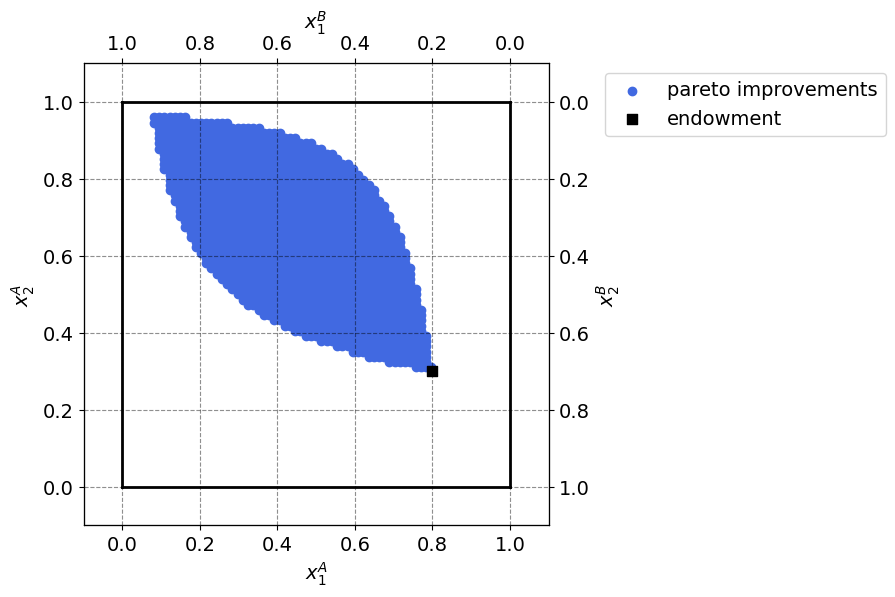

In [6]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

par = market.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A


x1, x2 = zip(*kombinationer)
ax_A.scatter(x1,x2,marker='o',color='royalblue',label='pareto improvements')
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment', s = 50)

# Allocations from below
#ax_A.scatter(market_clear_A[0],market_clear_A[1], color = "red", label = "market clearing allocation")
#ax_A.scatter(A_sets_price[0],A_sets_price[1], color = "yellow", label = "A is pricesetter")
#ax_A.scatter(market_maker[0],market_maker[1], color = "m", label = "A is market maker")

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,bbox_to_anchor=(1.1,1.0));

# Question 2
## Market error

In [7]:
# a
# Create price vector from 0.5 to 2.5
N = 75

P_1 = []
i = 0
P_1.append(0.5)

while P_1[i] < 2.5:
    i += 1
    P_1.append(0.5 + (2*i)/N)

print(P_1)
print("\n")

# b
# Calculate market error for all prices in the price vector
e1 = 10
e2 = 10

for p1 in P_1:
    e1_now, e2_now = market.check_market_clearing(p1)
    if np.abs(e1_now) < np.abs(e1) and np.abs(e2_now) < np.abs(e2):
        e1 = e1_now
        e2 = e2_now
        e1_best = e1_now
        e2_best = e2_now
        p1_best = p1

# c
# Find price which results in smallest error
print(e1_best)
print(e2_best)
print(p1_best)
print("\n")

# Checking market error for prices just above and below p1_best
print(market.check_market_clearing(0.9266666666666667)) 
print(market.check_market_clearing(0.9533333333333334))
print(market.check_market_clearing(0.98))


[0.5, 0.5266666666666666, 0.5533333333333333, 0.58, 0.6066666666666667, 0.6333333333333333, 0.66, 0.6866666666666666, 0.7133333333333334, 0.74, 0.7666666666666666, 0.7933333333333333, 0.8200000000000001, 0.8466666666666667, 0.8733333333333333, 0.9, 0.9266666666666667, 0.9533333333333334, 0.98, 1.0066666666666668, 1.0333333333333332, 1.06, 1.0866666666666667, 1.1133333333333333, 1.1400000000000001, 1.1666666666666665, 1.1933333333333334, 1.22, 1.2466666666666666, 1.2733333333333334, 1.3, 1.3266666666666667, 1.3533333333333335, 1.38, 1.4066666666666667, 1.4333333333333333, 1.46, 1.4866666666666668, 1.5133333333333334, 1.54, 1.5666666666666667, 1.5933333333333333, 1.62, 1.6466666666666667, 1.6733333333333333, 1.7, 1.7266666666666666, 1.7533333333333334, 1.78, 1.8066666666666666, 1.8333333333333333, 1.86, 1.8866666666666667, 1.9133333333333333, 1.94, 1.9666666666666666, 1.9933333333333334, 2.02, 2.046666666666667, 2.0733333333333333, 2.1, 2.126666666666667, 2.1533333333333333, 2.1799999999

# Question 3
## Market clearing price

In [8]:
print(f'Market clearing price = {p1_best:.4f}')

market_clear_A = market.demand_A(p1_best)
print(market_clear_A)

Market clearing price = 0.9533
(0.3715617715617715, 0.7084444444444445)


# Question 4a
## Max utility_A in P_1

In [9]:
uA_0 = -np.inf

for p1 in P_1:
    x1_A = 1 - market.demand_B(p1)[0]
    x2_A = 1 - market.demand_B(p1)[1]
    uA_now = market.utility_A(x1_A, x2_A)
    if uA_now > uA_0:
        uA_0 = uA_now
        uA_best = uA_now
        x1_A_best = x1_A
        x2_A_best = x2_A
        p1_A_best = p1

A_sets_price = x1_A_best, x2_A_best 
print(A_sets_price)
print(f"utility of A: {uA_best:.4f} \nconsumption of good 1: {x1_A_best:.4f} \nconsumption of good 2: {x2_A_best:.4f}\nThe optimal price: {p1_A_best:.4f}")

(0.619316843345112, 0.6408888888888888)
utility of A: 0.6336 
consumption of good 1: 0.6193 
consumption of good 2: 0.6409
The optimal price: 1.8867


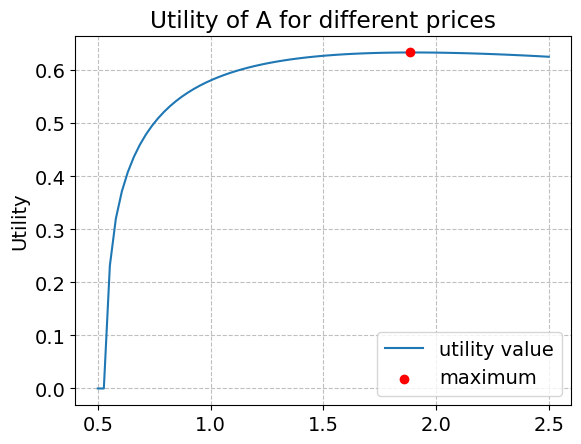

In [10]:
# Plot utility of A for different prices

import matplotlib.pyplot as plt

# Create an empty list to store the utility values
utility_values = []

# Iterate over each value of p1 in P_1
for p1 in P_1:
    x1_A = 1 - market.demand_B(p1)[0]
    x2_A = 1 - market.demand_B(p1)[1]
    # Calculate the utility for the given p1
    utility = market.utility_A(x1_A, x2_A)
    utility_values.append(utility)

# Plot the utility values
#plt.plot(P_1, utility_values)
#plt.scatter(p1_A_best, uA_best, c = "red")

# Plot the utility values
plt.plot(P_1, utility_values, label = "utility value")
plt.scatter(p1_A_best, uA_best, c="red", zorder=10, label = "maximum")  
plt.ylabel('Utility')
plt.title('Utility of A for different prices')
plt.legend()
plt.show()


# Question 4b
## Max utility_A in p1 > 0

In [11]:
from scipy import optimize

# Call an optimizer to solve the problem

# a. define objective function to minimize as a function of p
obj = lambda p: -market.utility_A(1 - market.demand_B(p)[0], 1 - market.demand_B(p)[1]) 

# b. define bounds
bounds = (1e-8, 100)

# c. intitial guess and call optimizer
p0 = 1
result = optimize.minimize(obj,p0,method='SLSQP')


#sol.p1 = result.x[0]

p = result.x[0]
util = -result.fun
print(f'optimal price = {p:.4f}\noptimal utility = {util:.4f}')

optimal price = 1.8968
optimal utility = 0.6336


In [12]:
# Compare with numerical optimization

print(f'Restricted price = {p1_A_best:.4f}\nRestricted utility = {uA_best:.4f}\n')
print(f'Unrestricted price = {p:.4f}\nUnrestricted utility = {util:.4f}\n')

diff = util - uA_best

print(f'difference in utility = {diff:.8f}')

Restricted price = 1.8867
Restricted utility = 0.6336

Unrestricted price = 1.8968
Unrestricted utility = 0.6336

difference in utility = 0.00000467


# Question 5a

In [13]:
kombinationer[0][1]

util_0 = 0

for i in kombinationer:
    util_now = market.utility_A(*i)
    if util_now > util_0:
        util_0 = util_now
        util_best = util_now
        x1_best, x2_best = i

market_maker = x1_best, x2_best

print(f'x1A = {x1_best:.4f}')
print(f'x2A = {x2_best:.4f}')
print(f'utility = {util_best:.4f}')




x1A = 0.5811
x2A = 0.8378
utility = 0.7416


## Question 5B

In [14]:
# Call an optimizer to solve the problem in two dimensions

# a. define objective function to minimize as a function of x1 and x2
def value_of_choice(x):
    return -market.utility_A(x[0], x[1]) 

# b. define bounds and restrictions
bounds = [(0, 1), (0, 1)]
constraints = ({'type': 'eq', 'fun': lambda x: market.utility_B(1 - x[0], 1 - x[1]) - uB_bar})

# c. intitial guess and call optimizer
guess = [market.par.w1A, market.par.w2A]
result = optimize.minimize(value_of_choice, guess, bounds = bounds, constraints = constraints, method='SLSQP')


x1_5b = result.x[0]
x2_5b = result.x[1]
util_5b = -result.fun
print(f'allocation = {x1_5b:.4f}, {x2_5b:.4f}\nmaximum utility = {util_5b:.4f}\n')

print(f'difference in utility = {util_5b - util_best:.4f}')

allocation = 0.5757, 0.8444
maximum utility = 0.7432

difference in utility = 0.0016


## Question 6a

In [15]:
# Opgave 6A

def value_of_choice(x):
    return -market.utility_A(x[0], x[1]) -market.utility_B(1 - x[0], 1 - x[1])

# b. define bounds and restrictions
bounds = [(0, 1), (0, 1)]

# c. intitial guess and call optimizer
guess = [market.par.w1A, market.par.w2A]
result = optimize.minimize(value_of_choice, guess, bounds = bounds, method='SLSQP')

print(result.x[0])
print(result.x[1])

print(-result.fun)


0.3334399256734374
0.6668016053890844
1.0582673636411322


## Question 6B


In [173]:
# Illustrate and compare with your results in euqstions 3)-6)

# 3: Market clearing allocation
# 4: consumer A chooses the price
# 5: consumer A chooses B's consumption, chooses Pareto point
# 6: Social planner chooses the optimal point

# a. illustrate the points in the Edgeworth box
# b. compare utilities for A and B

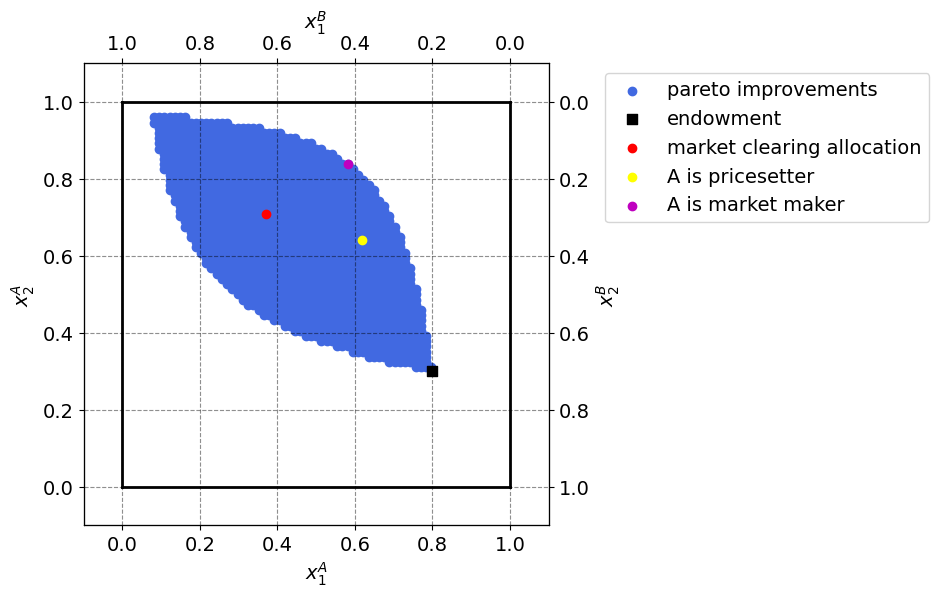

In [16]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

par = market.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A


x1, x2 = zip(*kombinationer)
ax_A.scatter(x1,x2,marker='o',color='royalblue',label='pareto improvements')
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment', s = 50)

# Allocations
ax_A.scatter(market_clear_A[0],market_clear_A[1], color = "red", label = "market clearing allocation")
ax_A.scatter(A_sets_price[0],A_sets_price[1], color = "yellow", label = "A is pricesetter")
ax_A.scatter(market_maker[0],market_maker[1], color = "m", label = "A is market maker")

# opg 8

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,bbox_to_anchor=(1.1,1.0));

# Lav widget

In [17]:
market.utility_A(market_clear_A[0], market_clear_A[1])
market.utility_A(A_sets_price[0],A_sets_price[1])
market.utility_A(market_maker[0],market_maker[1])


0.741627044262768

In [18]:
print(market_clear_A[1])

market_clear_A[1]

print(market_clear_A[0])

0.7084444444444445
0.3715617715617715


# Question 7

In [19]:
import random

random.seed(2024)

def W_float():
    wList = []
    for i in range(50):
        w_a = random.uniform(0, 1)
        w_b = random.uniform(0, 1)
        wList.append((w_a, w_b))
    return wList
wlist = W_float()
print((wlist[0]))

(0.47009071843107064, 0.7282642914232076)


# Question 8

In [20]:
uA_bar = market.utility_A(market.par.w1A, market.par.w2A)
uB_bar = market.utility_B(market.par.w1B, market.par.w2B)
def counttupples(wlist,uA_bar,uB_bar): 
    finallst = []
    for i in range(len(wlist)):
        x1a = wlist[i][0]
        x2a = wlist[i][1]
        uA = market.utility_A(x1a, x2a)
        x1b = 1 - x1a
        x2b = 1 - x2a
        uB = market.utility_B(x1b, x2b)
        if uA >= uA_bar and uB >= uB_bar:
            finallst.append((x1a, x2a))
    return(finallst)
belongToC = (counttupples(wlist,uA_bar,uB_bar))
print(len(belongToC))
print(belongToC)



13
[(0.47009071843107064, 0.7282642914232076), (0.3037513583913575, 0.8872982690000151), (0.41008858946872573, 0.7166143935816427), (0.4158721009442904, 0.727759134886051), (0.7040597821044818, 0.5193507229884871), (0.20638183272795785, 0.7525906989551181), (0.4685332173457043, 0.7090348812304769), (0.49334177818512226, 0.8365136133737727), (0.1698154262011824, 0.6955897269235669), (0.20691064433024053, 0.686573222767188), (0.7038401233828459, 0.35028548708964014), (0.26362584890459495, 0.5236985525454059), (0.35461123846566256, 0.70254540362515)]


In [21]:
N = 75

P_1 = []
i = 0
P_1.append(0.5)

while P_1[i] < 2.5:
    i += 1
    P_1.append(0.5 + (2*i)/N)

print(P_1)
print(len(P_1))

[0.5, 0.5266666666666666, 0.5533333333333333, 0.58, 0.6066666666666667, 0.6333333333333333, 0.66, 0.6866666666666666, 0.7133333333333334, 0.74, 0.7666666666666666, 0.7933333333333333, 0.8200000000000001, 0.8466666666666667, 0.8733333333333333, 0.9, 0.9266666666666667, 0.9533333333333334, 0.98, 1.0066666666666668, 1.0333333333333332, 1.06, 1.0866666666666667, 1.1133333333333333, 1.1400000000000001, 1.1666666666666665, 1.1933333333333334, 1.22, 1.2466666666666666, 1.2733333333333334, 1.3, 1.3266666666666667, 1.3533333333333335, 1.38, 1.4066666666666667, 1.4333333333333333, 1.46, 1.4866666666666668, 1.5133333333333334, 1.54, 1.5666666666666667, 1.5933333333333333, 1.62, 1.6466666666666667, 1.6733333333333333, 1.7, 1.7266666666666666, 1.7533333333333334, 1.78, 1.8066666666666666, 1.8333333333333333, 1.86, 1.8866666666666667, 1.9133333333333333, 1.94, 1.9666666666666666, 1.9933333333333334, 2.02, 2.046666666666667, 2.0733333333333333, 2.1, 2.126666666666667, 2.1533333333333333, 2.1799999999

In [22]:
marketeq = ExchangeEconomyClass()
#N = 20000
#P_1 = np.linspace(1e-10, 10, N)
x1_eq = []
p1_eq =[]
#belongToC[0] = market.par.w1A, market.par.w2A
#print(belongToC[1][0])
#print(belongToC[1][1])

e1 = 10
e2 = 10

for i in range(len(belongToC)):
    for p1 in P_1:
        marketeq.par.w1A = belongToC[i][0]
        marketeq.par.w2A = belongToC[i][1]
        marketeq.par.w1B = 1 - marketeq.par.w1A
        marketeq.par.w2B = 1 - marketeq.par.w2A

        e1_now, e2_now = marketeq.check_market_clearing(p1)
        if np.abs(e1_now) < np.abs(e1) and np.abs(e2_now) < np.abs(e2):
            e1 = e1_now
            e2 = e2_now
            e1_best = e1_now
            e2_best = e2_now
            p1_best = p1
    e1 = 10
    e2 = 10
    p1_eq.append(p1_best)
    x1_eq.append(marketeq.demand_A(p1_best)) 

print(p1_eq)
print(x1_eq)

[0.8733333333333333, 0.8466666666666667, 0.9, 0.9, 0.8733333333333333, 1.0333333333333332, 0.8733333333333333, 0.7666666666666666, 1.1133333333333333, 1.0866666666666667, 0.98, 1.1666666666666665, 0.9533333333333334]
[(0.4346603761525481, 0.7592067903464507), (0.4505804799624794, 0.7629829460697987), (0.4021089348531466, 0.723796082735664), (0.4081644539762638, 0.734696017157275), (0.4329120608243262, 0.7561530662398231), (0.31156513745398107, 0.6439012840715609), (0.4268017395848823, 0.7454803718082613), (0.5281488304271158, 0.8098282066549111), (0.26486553934956586, 0.5897672676183667), (0.27957549783416646, 0.6076107486262552), (0.35375809796082613, 0.6933658720032193), (0.23750344083831432, 0.5541746952894001), (0.3638489921780005, 0.6937387450860545)]


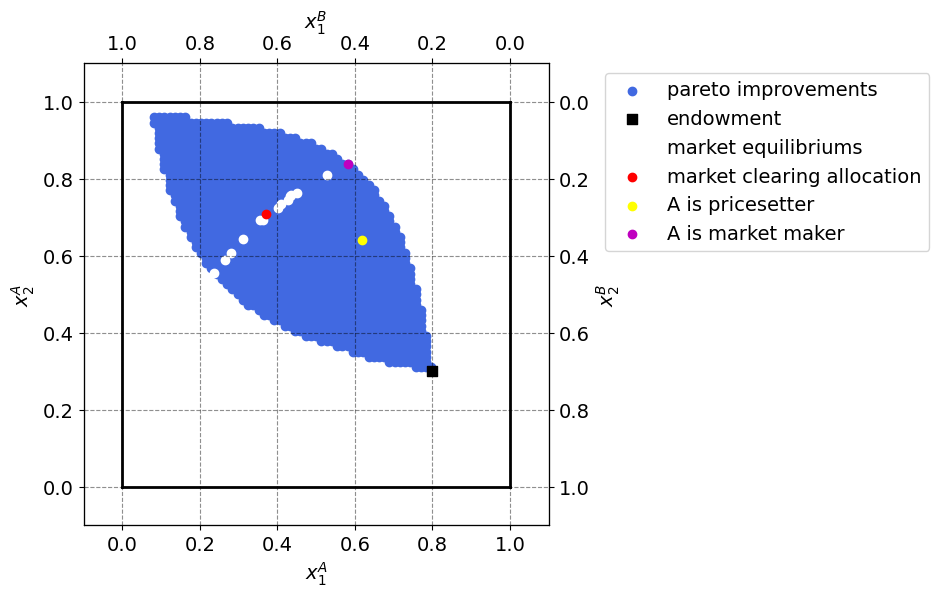

In [23]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

par = market.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A


x1, x2 = zip(*kombinationer)
ax_A.scatter(x1,x2,marker='o',color='royalblue',label='pareto improvements')
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment', s = 50)

# Allocations
x1_8, x2_8 = zip(*x1_eq)
ax_A.scatter(x1_8,x2_8,marker='o',color='white',label='market equilibriums')
ax_A.scatter(market_clear_A[0],market_clear_A[1], color = "red", label = "market clearing allocation")
ax_A.scatter(A_sets_price[0],A_sets_price[1], color = "yellow", label = "A is pricesetter")
ax_A.scatter(market_maker[0],market_maker[1], color = "m", label = "A is market maker")

# opg 8

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,bbox_to_anchor=(1.1,1.0));

# Lav widget